In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import sys
sys.path.append("../")
import tensorflow_riemopt as riemopt

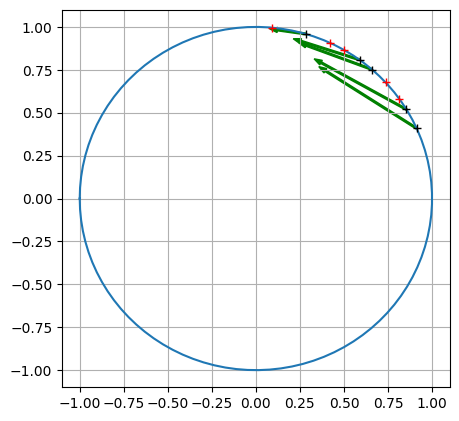

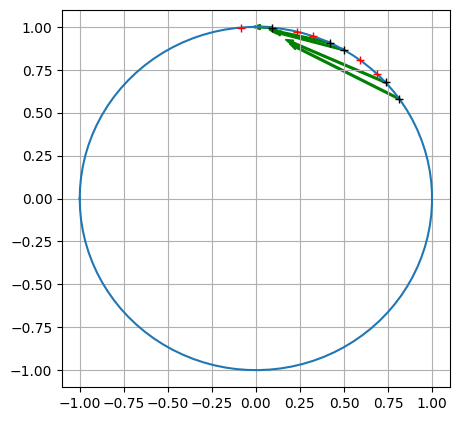

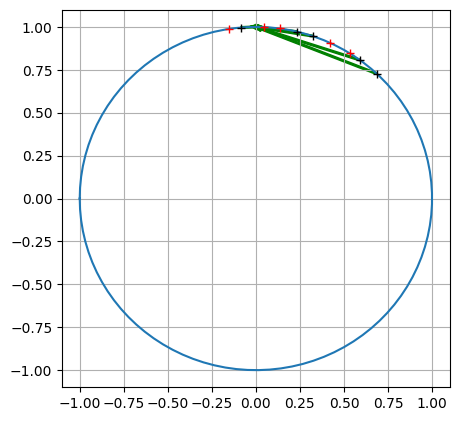

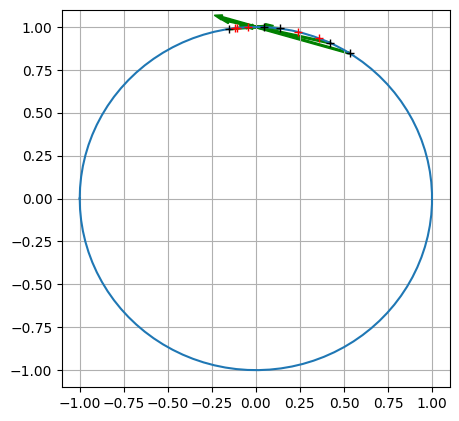

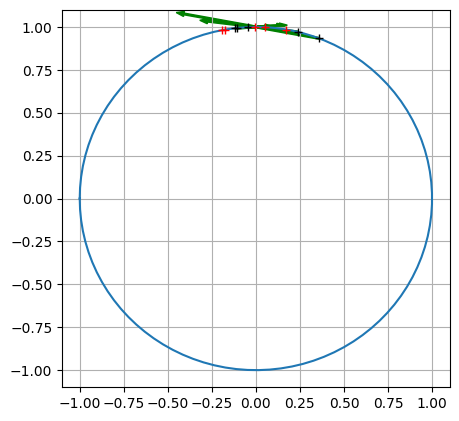

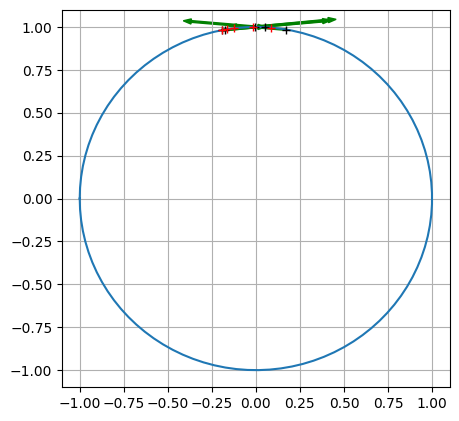

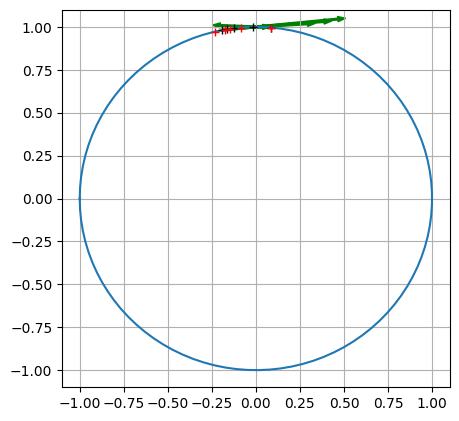

In [2]:
STEPS = 7
N = 5

sphere = riemopt.manifolds.Sphere()
var = tf.Variable(sphere.random(shape=(N, 2)))
riemopt.variable.assign_to_manifold(var, sphere)

opt = riemopt.optimizers.RiemannianAdam(learning_rate=0.2)

npole = tf.constant([0., 1.])
phi = np.linspace(-np.pi, np.pi, 100)

for _ in range(STEPS):
    with tf.GradientTape() as tape:
        loss = tf.linalg.norm(var - npole)
    grad = tape.gradient(loss, [var])
    var_np = var.numpy()
    egrad_np = grad[0].numpy()
    opt.apply_gradients(zip(grad, [var]))
    var_t_np = var.numpy()

    fig = plt.figure(figsize=(5, 5), dpi=100)
    plt.grid()
    plt.plot(np.cos(phi), np.sin(phi))
    plt.plot(var_np[:, 0], var_np[:, 1], '+', color='black')
    for i in range(len(egrad_np)):
        plt.arrow(var_np[i][0], var_np[i][1], -egrad_np[i][0], -egrad_np[i][1],
                  width=0.01, color='green')
    plt.plot(var_t_np[:, 0], var_t_np[:, 1], '+', color='red')
    plt.show()